## Exploratory Data Analysis

### imports

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Unzip the dataset to start working with it

In [3]:
!unzip -q North_America-United_States.zip

replace North_America-United_States.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


First, let's start by looking at what data is in the dataset

In [23]:
data = pd.read_csv("North_America-United_States.csv")

for name in data.columns:
  if len(data[name].unique()) < 10:
    print(name, data[name].unique())

iso [840]
year [2022 2021 2020]
time_precision [1 2 3]
event_type ['Protests' 'Riots']
sub_event_type ['Excessive force against protesters' 'Peaceful protest'
 'Protest with intervention' 'Violent demonstration' 'Mob violence']
actor1 ['Protesters (United States)' 'Rioters (United States)'
 'Protesters (International)' 'Protesters (Turkmenistan)'
 'Protesters (Ethiopia)' 'Protesters (Israel)']
inter1 [6 5]
inter2 [3 0 6 1 7 5 8 4]
region ['North America']
country ['United States']
admin3 [nan]
geo_precision [1 3 2]
fatalities [0 1 3 2]
iso3 ['USA']


Drop columns that don't give us useful or new information for exploratory data analysis. Columns that were dropped had either no new information (for example, all the data in "country" was the united states) or gave redundant information (like location, which could be found from latitude and longitude).

In [120]:
data_clean = data.drop(columns = ["data_id", "timestamp", "location", "event_id_cnty", "event_id_no_cnty", "iso3", "region", "country", "admin3", "iso", "notes", "time_precision", "geo_precision", "source", ])

In [65]:
print(data_clean.columns)
print(data_clean.fatalities.unique())
print(len(data_clean.sub_event_type.unique()))
print(len(data_clean))
# can use source scale to show how each is represented in each source scale
# can show fatalities across each class
print(data_clean.sub_event_type.unique())

Index(['event_date', 'year', 'event_type', 'sub_event_type', 'actor1',
       'assoc_actor_1', 'inter1', 'actor2', 'assoc_actor_2', 'inter2',
       'interaction', 'admin1', 'admin2', 'latitude', 'longitude',
       'source_scale', 'fatalities'],
      dtype='object')
[0 1 3 2]
5
42253
['Excessive force against protesters' 'Peaceful protest'
 'Protest with intervention' 'Violent demonstration' 'Mob violence']


## Making visualizations of the data

### types of protests

<ipython-input-123-f04d9d2e0a1d>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(data_clean.sub_event_type.unique(), rotation=45)


[Text(0, 0, 'Excessive force against protesters'),
 Text(1, 0, 'Peaceful protest'),
 Text(2, 0, 'Protest with intervention'),
 Text(3, 0, 'Violent demonstration'),
 Text(4, 0, 'Mob violence')]

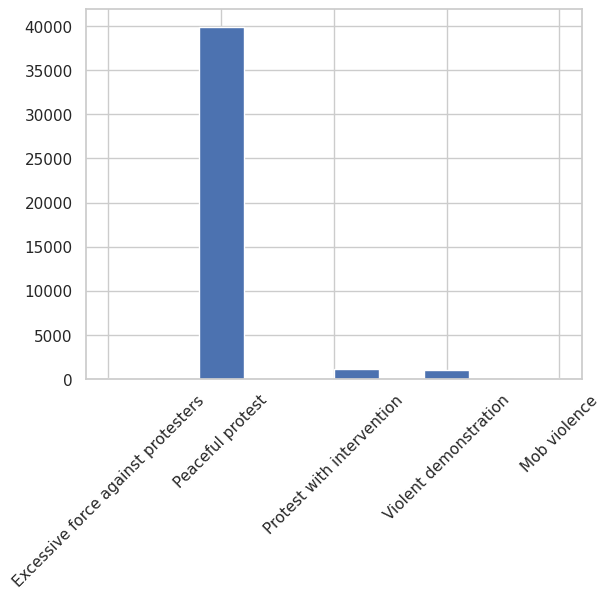

In [123]:
fig = plt.figure()
ax1 = fig.add_subplot()
ax1.hist(data_clean.sub_event_type)
ax1.set_xticklabels(data_clean.sub_event_type.unique(), rotation=45)

### locations of protests in the US

This shows where protests are and in what density they are showing up in the US. The US's latitudinal range is from 7 to 85, and the longitudinal range is from -20 to -179.

<Axes: xlabel='longitude', ylabel='latitude'>

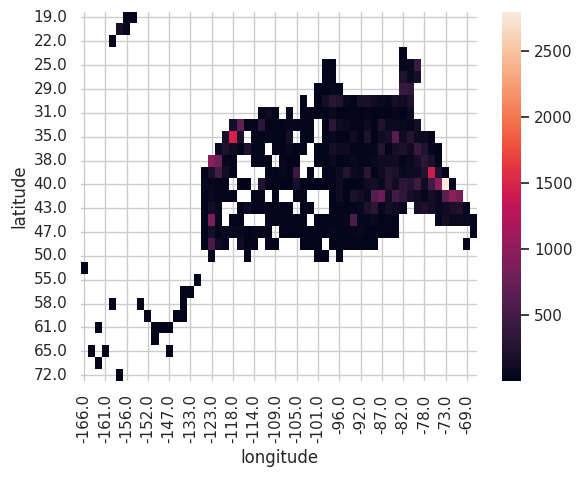

In [142]:
data_clean.latitude = data_clean.latitude.apply(lambda x: round(x/10, 1)*10)
data_clean.longitude = data_clean.longitude.apply(lambda x: round(x/10, 1)*10g)
data_clean_loc = data_clean.groupby(by = ["latitude", "longitude"]).size()
data_clean_loc = data_clean_loc.reset_index()
data_clean_loc.columns = ["latitude", "longitude", "count"]
loc = data_clean_loc.pivot_table(index = "latitude", columns = "longitude", values = "count")
sns.set_theme(style='whitegrid')
sns.heatmap(loc)

### fatalities by type of protest

In [141]:
eventFatalSub = data_clean.groupby(by = ["sub_event_type", "fatalities"]).size()
eventFatalSub = eventFatalSub.reset_index()
eventFatalSub.columns = ["Event Type", "Fatalities", "Count"]

eventFatal = data_clean.groupby(by = ["event_type", "fatalities"]).size()
eventFatal = eventFatal.reset_index()
eventFatal.columns = ["Event Type", "Fatalities", "Count"]

print(eventFatalSub)
print(eventFatal)

                           Event Type  Fatalities  Count
0  Excessive force against protesters           0    141
1  Excessive force against protesters           1      4
2                        Mob violence           0     90
3                        Mob violence           1      6
4                    Peaceful protest           0  39911
5           Protest with intervention           0   1125
6               Violent demonstration           0    960
7               Violent demonstration           1     13
8               Violent demonstration           2      2
9               Violent demonstration           3      1
  Event Type  Fatalities  Count
0   Protests           0  41177
1   Protests           1      4
2      Riots           0   1050
3      Riots           1     19
4      Riots           2      2
5      Riots           3      1
